In [1]:
import sqlite3

# Connect to both databases
conn1 = sqlite3.connect('winners')
conn2 = sqlite3.connect('lotto_numbers')


In [2]:
import pandas as pd


In [3]:
df1 = pd.read_sql_query("select * from winners;", conn1)

In [4]:
df2 = pd.read_sql_query("select * from lotto_numbers;", conn2)

In [5]:

conn1.close()
conn2.close()

In [6]:
df1.head() #winners

,page,date,winner,jackpot,four_fifth,three_fifth,two_fifth
0,7112,"Jan 19, 2014",0,180019,38,1176,12194
1,7113,"Jan 19, 2014",0,212435,37,1779,20024
2,7114,"Jan 20, 2014",0,263218,54,1676,17763
3,7115,"Jan 20, 2014",1,400000,107,3071,30352
4,7116,"Jan 21, 2014",0,73974,18,693,7451


In [7]:
df2.head() #lotto_numbers

,page,date,day_of_week,time_of_day,first,second,third,fourth,fifth
0,7112,"Jan 19, 2014",Sunday,midday,12,17,20,22,35
1,7113,"Jan 19, 2014",Sunday,evening,11,13,20,24,38
2,7114,"Jan 20, 2014",Monday,midday,3,5,12,18,32
3,7115,"Jan 20, 2014",Monday,evening,3,5,12,16,29
4,7116,"Jan 21, 2014",Tuesday,midday,20,29,35,36,37


In [8]:
big_df = pd.merge(df1, df2, on='page', how= 'inner')

In [9]:
big_df.head()

,page,date_x,winner,jackpot,four_fifth,three_fifth,two_fifth,date_y,day_of_week,time_of_day,first,second,third,fourth,fifth
0,7112,"Jan 19, 2014",0,180019,38,1176,12194,"Jan 19, 2014",Sunday,midday,12,17,20,22,35
1,7113,"Jan 19, 2014",0,212435,37,1779,20024,"Jan 19, 2014",Sunday,evening,11,13,20,24,38
2,7114,"Jan 20, 2014",0,263218,54,1676,17763,"Jan 20, 2014",Monday,midday,3,5,12,18,32
3,7115,"Jan 20, 2014",1,400000,107,3071,30352,"Jan 20, 2014",Monday,evening,3,5,12,16,29
4,7116,"Jan 21, 2014",0,73974,18,693,7451,"Jan 21, 2014",Tuesday,midday,20,29,35,36,37


In [10]:
big_df.drop(['page', 'date_x', 'date_y' , 'day_of_week', 'time_of_day'], axis='columns', inplace=True)

In [11]:
big_df.head(11)

,winner,jackpot,four_fifth,three_fifth,two_fifth,first,second,third,fourth,fifth
0,0,180019,38,1176,12194,12,17,20,22,35
1,0,212435,37,1779,20024,11,13,20,24,38
2,0,263218,54,1676,17763,3,5,12,18,32
3,1,400000,107,3071,30352,3,5,12,16,29
4,0,73974,18,693,7451,20,29,35,36,37
5,1,150000,60,1797,18274,11,14,19,23,30
6,0,72876,30,841,10416,1,3,22,26,36
7,0,100000,39,1325,15482,12,28,29,31,39
8,0,144990,32,1022,11029,10,18,21,33,35
9,0,176037,103,2633,23806,9,11,13,19,20


In [12]:
big_df.columns

Index(['winner', 'jackpot', 'four_fifth', 'three_fifth', 'two_fifth', 'first',
       'second', 'third', 'fourth', 'fifth'],
      dtype='object')

/Users/jacobcrawford/PycharmProjects/Learn_Web_Scraping/lotto/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jacobcrawford/PycharmProjects/Learn_Web_Scraping/lotto/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jacobcrawford/PycharmProjects/Learn_Web_Scraping/lotto/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jacobcrawford/PycharmPro

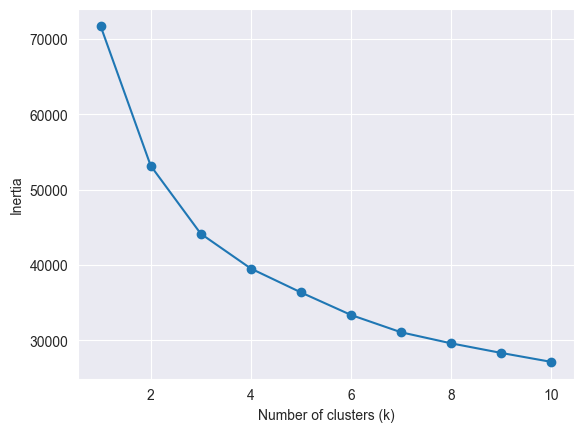

/Users/jacobcrawford/PycharmProjects/Learn_Web_Scraping/lotto/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'merged_df' contains the data you want to cluster

# Feature selection and data preparation
# Replace with the actual features you want to use
selected_features = big_df[['winner', 'jackpot', 'four_fifth', 'three_fifth', 'two_fifth', 'first', 'second', 'third', 'fourth',
       'fifth']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(big_df)

# Choosing the number of clusters (k) using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow method, choose an appropriate value for k

# KNN Clustering
k = 3  # Replace with the chosen number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the data frame
big_df['cluster'] = cluster_labels

# Now 'merged_df' contains a new 'cluster' column with cluster assignments


In [14]:
import seaborn as sns

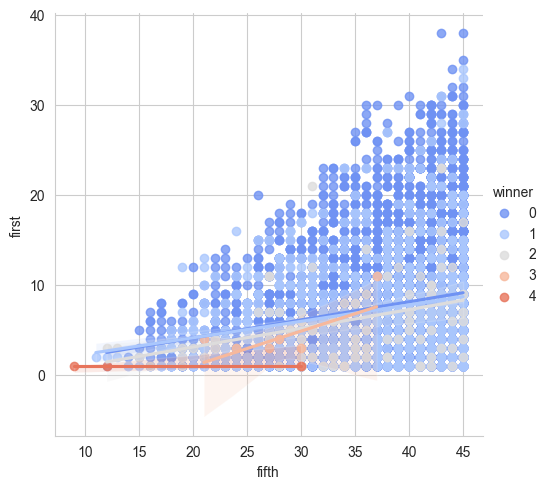

In [15]:
sns.set_style('whitegrid')
sns.lmplot(x='fifth', y='first', data=big_df, hue='winner', palette='coolwarm', aspect=1, fit_reg=True)

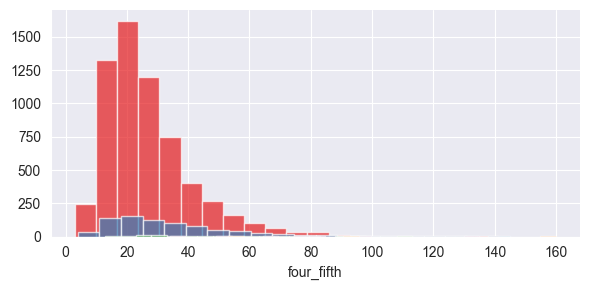

In [16]:
sns.set_style('darkgrid')
g = sns.FacetGrid(big_df, hue="winner", palette='Set1', aspect=2)
g = g.map(plt.hist,'four_fifth',bins=20,alpha=0.7)

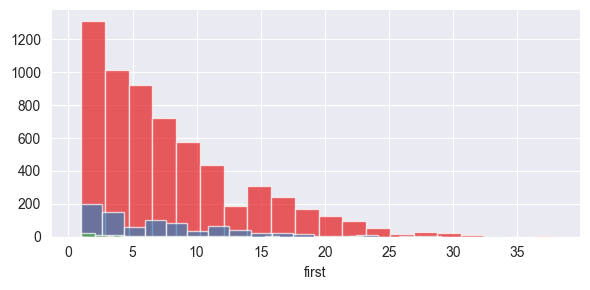

In [17]:
sns.set_style('darkgrid')
g = sns.FacetGrid(big_df, hue="winner", palette='Set1', aspect=2)
g = g.map(plt.hist,'first',bins=20,alpha=0.7)

In [18]:
import numpy as np
# Calculate the correlation matrix
corr_matrix = big_df.corr()

# Set a threshold for the absolute correlation value
threshold = 0.5  # Adjust the threshold as needed

# Filter correlations based on the threshold
filtered_corr = corr_matrix[(corr_matrix.abs() > threshold) & (corr_matrix.abs() < 1)]

# Display the filtered correlation table
print(filtered_corr)


             winner   jackpot  four_fifth  three_fifth  two_fifth     first  \
winner          NaN       NaN         NaN          NaN        NaN       NaN   
jackpot         NaN       NaN         NaN     0.614838   0.700633       NaN   
four_fifth      NaN       NaN         NaN     0.898912   0.819113       NaN   
three_fifth     NaN  0.614838    0.898912          NaN   0.968854       NaN   
two_fifth       NaN  0.700633    0.819113     0.968854        NaN       NaN   
first           NaN       NaN         NaN          NaN        NaN       NaN   
second          NaN       NaN         NaN          NaN        NaN  0.641898   
third           NaN       NaN         NaN          NaN        NaN       NaN   
fourth          NaN       NaN         NaN          NaN        NaN       NaN   
fifth           NaN       NaN         NaN          NaN        NaN       NaN   
cluster         NaN       NaN         NaN          NaN        NaN       NaN   

               second     third    fourth    fifth 

In [19]:
big_df[big_df['winner']>0]

,winner,jackpot,four_fifth,three_fifth,two_fifth,first,second,third,fourth,fifth,cluster
3,1,400000,107,3071,30352,3,5,12,16,29,2
5,1,150000,60,1797,18274,11,14,19,23,30,2
19,1,750000,130,4103,44925,9,11,27,33,39,2
24,1,300000,140,2843,21664,2,4,5,7,12,2
25,1,100000,71,2348,23186,10,17,23,27,29,2
...,...,...,...,...,...,...,...,...,...,...,...
7139,1,250000,13,580,8047,5,15,24,31,34,0
7140,1,100000,14,489,6739,20,32,39,42,44,1
7147,1,400000,29,1215,12969,5,10,19,27,30,0
7158,1,600000,34,1284,17004,6,24,28,34,37,1


In [20]:
big_df.drop('cluster', inplace=True, axis=1)

In [21]:
big_df.head()

,winner,jackpot,four_fifth,three_fifth,two_fifth,first,second,third,fourth,fifth
0,0,180019,38,1176,12194,12,17,20,22,35
1,0,212435,37,1779,20024,11,13,20,24,38
2,0,263218,54,1676,17763,3,5,12,18,32
3,1,400000,107,3071,30352,3,5,12,16,29
4,0,73974,18,693,7451,20,29,35,36,37


In [22]:
def win_convert(winner):
    if winner > 0:
        return 1
    else:
        return 0

In [23]:
big_df['win_bool'] = big_df['winner'].apply(win_convert)

In [24]:
big_df.head()


,winner,jackpot,four_fifth,three_fifth,two_fifth,first,second,third,fourth,fifth,win_bool
0,0,180019,38,1176,12194,12,17,20,22,35,0
1,0,212435,37,1779,20024,11,13,20,24,38,0
2,0,263218,54,1676,17763,3,5,12,18,32,0
3,1,400000,107,3071,30352,3,5,12,16,29,1
4,0,73974,18,693,7451,20,29,35,36,37,0


In [25]:
log_df = big_df[['jackpot', 'four_fifth', 'three_fifth', 'two_fifth', 'first','second','third','fourth','fifth']]


In [26]:
log_df.head()

,jackpot,four_fifth,three_fifth,two_fifth,first,second,third,fourth,fifth
0,180019,38,1176,12194,12,17,20,22,35
1,212435,37,1779,20024,11,13,20,24,38
2,263218,54,1676,17763,3,5,12,18,32
3,400000,107,3071,30352,3,5,12,16,29
4,73974,18,693,7451,20,29,35,36,37


In [27]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(log_df, big_df['win_bool'], test_size=0.30, 
                                                    random_state=101)

In [29]:
X_train.head()

,jackpot,four_fifth,three_fifth,two_fifth,first,second,third,fourth,fifth
4739,200000,22,884,9906,10,13,15,22,29
1494,337677,31,1453,18806,5,14,20,24,35
5298,150000,24,692,9404,19,29,31,43,45
2662,229218,10,1007,13698,5,8,28,35,41
6270,150000,41,1319,13675,8,10,13,17,19


In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
y_train.head()

4739    1
1494    0
5298    0
2662    0
6270    0
Name: win_bool, dtype: int64

In [32]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [33]:
predictions = logmodel.predict(X_test)


In [34]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1873
           1       1.00      0.01      0.02       280

    accuracy                           0.87      2153
   macro avg       0.94      0.51      0.48      2153
weighted avg       0.89      0.87      0.81      2153


In [35]:
print(accuracy_score(y_test, predictions))

0.871342313051556


In [36]:
log_df[big_df['win_bool']==1]

,jackpot,four_fifth,three_fifth,two_fifth,first,second,third,fourth,fifth
3,400000,107,3071,30352,3,5,12,16,29
5,150000,60,1797,18274,11,14,19,23,30
19,750000,130,4103,44925,9,11,27,33,39
24,300000,140,2843,21664,2,4,5,7,12
25,100000,71,2348,23186,10,17,23,27,29
...,...,...,...,...,...,...,...,...,...
7139,250000,13,580,8047,5,15,24,31,34
7140,100000,14,489,6739,20,32,39,42,44
7147,400000,29,1215,12969,5,10,19,27,30
7158,600000,34,1284,17004,6,24,28,34,37


<Axes: ylabel='Frequency'>

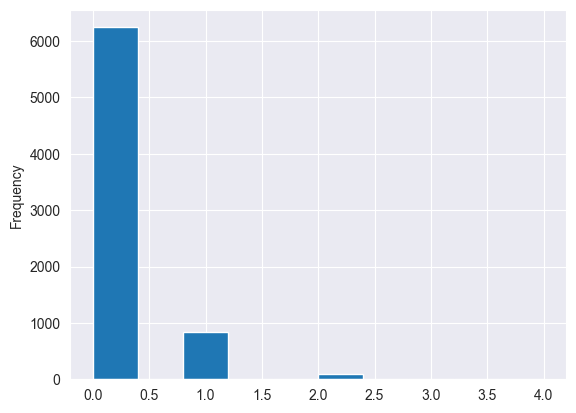

In [37]:
big_df['winner'].plot(kind='hist')

<Axes: >

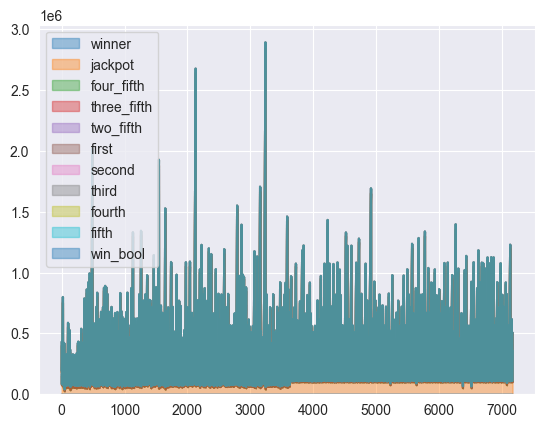

In [38]:
big_df.plot.area(alpha=0.4)

In [39]:
big_df.head()

,winner,jackpot,four_fifth,three_fifth,two_fifth,first,second,third,fourth,fifth,win_bool
0,0,180019,38,1176,12194,12,17,20,22,35,0
1,0,212435,37,1779,20024,11,13,20,24,38,0
2,0,263218,54,1676,17763,3,5,12,18,32,0
3,1,400000,107,3071,30352,3,5,12,16,29,1
4,0,73974,18,693,7451,20,29,35,36,37,0


AttributeError: 'Axes' object has no attribute 'area'

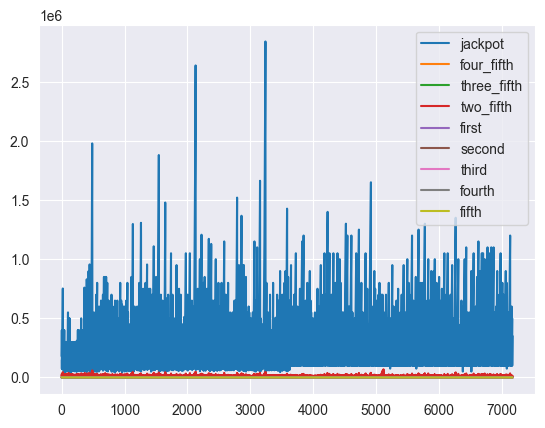

In [40]:
log_df.plot().area(alpha = .9)
#df2.plot.area(alpha=0.4)

<Axes: >

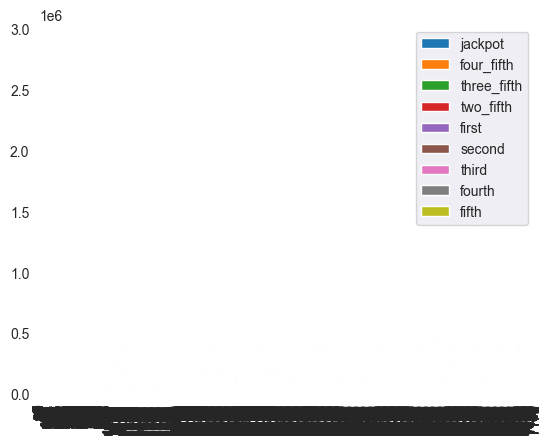

In [41]:
log_df.plot.bar(stacked=True)

In [42]:
log_df.plot.scatter(big_df, big_df['winner_bool'])

KeyError: 'winner_bool'

In [ ]:
log_df.plot.box()

In [ ]:
log_df.plot.hexbin(x='jackpot',y='winner_bool',gridsize=25,cmap='coolwarm')

In [43]:
log_df.plot.kde()

<Axes: ylabel='Density'>

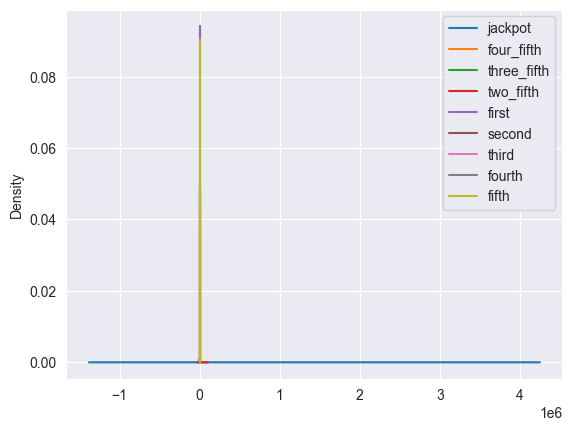

In [43]:
log_df.plot.density()


In [ ]:
log_df.plot.pie(y='winner_bool',figsize=(5, 5))